In [1]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import os
from ast import literal_eval  # 문자열로 저장된 딕셔너리를 진짜 딕셔너리로 변환

# GCS 파일 경로에서 데이터 불러오기 위한 라이브러리
from google.cloud import storage
from google.oauth2 import service_account

In [2]:

# 기본 정보 확인 함수 
def show_df_info(df, df_name):
    """
    DataFrame의 기본 정보와 통계 요약을 출력하는 함수
    """
    print(f"\n{df_name} 형태:")
    display(df.shape)
    print(f"\n{df_name} 첫 5행:")
    display(df.head())
    print(f"\n{df_name} 정보:")
    df.info()
    print(f"\n{df_name} 통계 요약:")
    display(df.describe())
    print(f"\n{df_name} 통계 요약:")
    display(df.describe(include = 'O'))
    print(f"\n{df_name} 결측치 확인:")
    display(df.isnull().sum())
    # print(f"\n{df_name} 중복값 확인:")
    # print(df.iloc[:,1:].duplicated().sum())

# 파일 불러오기 및 확인

In [3]:
# # 230430 test
# # GCS 파일 경로
# gcs_path = "gs://part4_project/events/230430.parquet"
# # 데이터 불러오기
# test_df = pd.read_parquet(gcs_path, storage_options={"token": None}) # key_path // 오늘은 에러나서 None으로...

# # 확인
# display(test_df.head())
# test_df.shape

In [3]:
# 인증
key_path = "../config/codeit_project_vm_key.json"
credentials = service_account.Credentials.from_service_account_file(key_path)

# GCS 클라이언트 생성
client = storage.Client(credentials=credentials)
bucket = client.bucket("part4_project")

# 'events_ver2/' 경로에 있는 .parquet 파일 리스트 가져오기
blobs = bucket.list_blobs(prefix="events_ver2/")
events_file_list = [f"gs://part4_project/{blob.name}" for blob in blobs if blob.name.endswith(".parquet")] 

# 결과 확인
events_file_list

['gs://part4_project/events_ver2/230430.parquet',
 'gs://part4_project/events_ver2/230506.parquet',
 'gs://part4_project/events_ver2/230512.parquet',
 'gs://part4_project/events_ver2/230518.parquet',
 'gs://part4_project/events_ver2/230524.parquet',
 'gs://part4_project/events_ver2/230530.parquet',
 'gs://part4_project/events_ver2/230605.parquet',
 'gs://part4_project/events_ver2/230611.parquet',
 'gs://part4_project/events_ver2/230617.parquet',
 'gs://part4_project/events_ver2/230623.parquet',
 'gs://part4_project/events_ver2/230629.parquet',
 'gs://part4_project/events_ver2/230705.parquet']

In [4]:
# 파일들을 각각 변수로 불러오기
for title in events_file_list:
    # GCS 경로에서 파일명 추출
    file_name = title.split('/')[-1].replace('.parquet', '')
    
    # Parquet 파일 읽기
    df = pd.read_parquet(title, storage_options={"token": key_path})
    
    # 각각의 이름_df로 저장 (ex. device_properties_df)
    globals()[f"df_{file_name}"] = df
    
    # 출력 확인 (shape + head)
    print(f"\n df_{file_name} 불러오기 완료")
    print(f"→ shape: {df.shape}")
    print(f"→ 첫 5행:")
    display(df.head())
    
    # event_datetime이 있는 경우 날짜 변환 및 범위 출력
    if 'event_datetime' in df.columns:
        try:
            df['event_datetime'] = pd.to_datetime(df['event_datetime'])
            min_date = df['event_datetime'].min().date()
            max_date = df['event_datetime'].max().date()
            print(f"📆 df_{file_name} 의 event_datetime 범위: {min_date} ~ {max_date}")
        except Exception as e:
            print(f"⚠️ df_{file_name} 의 event_datetime 변환 중 오류 발생: {e}")
    else:
        print(f"⛔ df_{file_name} 에는 'event_datetime' 컬럼이 존재하지 않음")


 df_230430 불러오기 완료
→ shape: (8588422, 8)
→ 첫 5행:


,event_datetime,session_id,device_id,event_key,description,location,devicemodel,language
0,2023-05-01 09:00:00,jgGFnoyc6GWuGIEgjp3nUoKRQbF3,cfc34eab-6930-488b-8109-70d37cec7dae,button,다음,signotherinputscreen,"iPhone10,4",ko-KR
1,2023-05-01 09:00:00,n3PI8GZnRFOKpJslIRgckMeRiln1,0dde2ecb-ff03-440f-98f3-94f20978b796,button,vote 선택,homevotesscreen,"iPhone14,4",ko-CA
2,2023-05-01 09:00:00,L31Dl8vRtdWPJ8XC0gGs1mPwzJH2,b50774ed-24ce-49e1-9383-945ff3aea9ff,button,친구선택,homeenquetescreen,SM-A125N,ko
3,2023-05-01 09:00:00,QjToElcYNkVxszJDHBhqtITlzDJ3,0999c6b6-c579-4c0f-916c-9a113010f84a,button,이름 셔플!,homeenquetescreen,SM-A305N,ko
4,2023-05-01 09:00:00,VRpXf303RGU730fIO4EjWstzAJi1,45985493-ed35-4cc5-935f-1bcf922e213c,button,앱바 뒤로가기,homefriendprofilescreen,"iPhone14,5",ko-KR


📆 df_230430 의 event_datetime 범위: 2023-05-01 ~ 2023-05-07

 df_230506 불러오기 완료
→ shape: (7106588, 6)
→ 첫 5행:


,event_datetime,session_id,device_id,event_key,devicemodel,language
0,2023-05-07 09:00:00,OoWMTpTWpUa4m8I1RiKOk75Xnvs1,498dbc0f-4537-41dc-93ec-f4406302a3b0,$session_end,"iPhone14,5",ko-KR
1,2023-05-07 09:00:00,CrFi87nvwiVvHExxP9uSfIHOmBy1,7770afa8-e228-4736-aa2a-658ebe2e3d25,$session_end,"iPhone12,8",ko-KR
2,2023-05-07 09:00:00,W6frWgWJtbWTJwdm6eVWPGKwY2Y2,9fbdc45d-a74a-4d9f-9d40-0f400b72877e,$session_end,"iPhone14,8",ko-KR
3,2023-05-07 09:00:00,4EFB4D45-0AAF-424A-8E4E-2F19249C8892,4efb4d45-0aaf-424a-8e4e-2f19249c8892,$session_start,"iPhone12,3",ko-KR
4,2023-05-07 09:00:00,JdxVFvtz6AcxxOZVvl6plHayjYJ3,96348488-4d6a-49a8-8995-452718157fd7,$session_start,SM-A315N,ko


📆 df_230506 의 event_datetime 범위: 2023-05-07 ~ 2023-05-13

 df_230512 불러오기 완료
→ shape: (12188804, 6)
→ 첫 5행:


,event_datetime,session_id,device_id,event_key,devicemodel,language
0,2023-05-13 09:00:00,6zkImM4PD0MHIbJ9zRVXs6vX6e62,cb7a48f6-6882-4223-98fd-4fe73cb3903b,$session_start,"iPhone14,4",ko-KR
1,2023-05-13 09:00:00,Sq5vui6fg2Nhz2EHeC8e4PWyxo13,b2512274-1161-4fd2-a4e8-b40f1ecc0372,$session_end,"iPhone12,8",ko-KR
2,2023-05-13 09:00:00,RyWeiMNMACUhbawb63ITBMX1c1U2,75f9bcd9-78c8-4dd6-a91e-0faf85a10526,$session_end,"iPhone15,2",ko-KR
3,2023-05-13 09:00:00,3OaNLuqTVDTkMEc8IsZNBxF9hsH2,380ebcac-4f9d-4004-968d-cf6372908adc,$session_start,"iPhone12,1",en-KR
4,2023-05-13 09:00:00,rWBKAsEaG3cpHuAPRyohFr3k6PB2,290b1a00-659d-4d24-a26d-5524d7ac44ce,$session_end,"iPhone14,3",ko-KR


📆 df_230512 의 event_datetime 범위: 2023-05-13 ~ 2023-05-19

 df_230518 불러오기 완료
→ shape: (8224556, 6)
→ 첫 5행:


,event_datetime,session_id,device_id,event_key,devicemodel,language
0,2023-05-19 09:00:00,nALWgF7izudSzKXArsiAOaYYsr23,c370e36d-b84c-4c97-af37-db356caf1741,$session_start,"iPhone14,2",ko-KR
1,2023-05-19 09:00:00,E9A0131C-A70A-4917-88D8-257223F0A767,e9a0131c-a70a-4917-88d8-257223f0a767,$session_end,"iPhone11,2",ko-KR
2,2023-05-19 09:00:00,euhK4oLwdGPVT6sPNNN1Rs7xEKz1,2ab9b1b1-41a7-4f6e-af31-85daac4509ea,$session_start,"iPhone14,7",ko-KR
3,2023-05-19 09:00:00,TYAFQPAWozbqfQ3I296QuXJnWrx1,c3236b64-a328-4743-8afd-461f85f1f1e0,$session_start,"iPhone15,3",ko-KR
4,2023-05-19 09:00:00,XhhuxAQvEcXdlD1JjbPC8H3AF602,efe3418d-ad59-4a20-a5f9-43d2195d1a08,$session_start,"iPhone14,7",ko-KR


📆 df_230518 의 event_datetime 범위: 2023-05-19 ~ 2023-05-25

 df_230524 불러오기 완료
→ shape: (2586328, 6)
→ 첫 5행:


,event_datetime,session_id,device_id,event_key,devicemodel,language
0,2023-05-25 09:00:00,TeeVVRGrpuXE5q6f7pAu9ULVNvG3,b6afceaa-cc9c-4a66-b92f-9e202f9eb328,$session_start,"iPhone14,7",ko-KR
1,2023-05-25 09:00:00,9tcpOeHvyldCUXMgRyFVQI86rf13,54a8af4d-47bf-4951-87c2-1817b26d1c31,$session_start,"iPhone12,1",ko-KR
2,2023-05-25 09:00:00,aiDrtN8uHiQXRXmLMJhf27hKA4B3,b08ee1df-0bc6-4b38-9474-8cbc55fd6f17,$session_start,"iPhone12,1",ko-KR
3,2023-05-25 09:00:00,Oqmt3cCrCQZAa0TT3B4s2kTOG1k1,ace73d0e-04d6-4d03-9460-a0a1143253f7,$session_start,"iPhone11,8",ko-KR
4,2023-05-25 09:00:00,GA1Nz2ehK2TmsRcqBzXQn6hkDHH2,2adda5ce-1d37-43cd-8cbd-c75c06f84f74,$session_start,"iPhone14,7",ko-KR


📆 df_230524 의 event_datetime 범위: 2023-05-25 ~ 2023-05-31

 df_230530 불러오기 완료
→ shape: (2313, 6)
→ 첫 5행:


,event_datetime,session_id,device_id,event_key,devicemodel,language
0,2023-05-31 09:01:06,VAb6ai91iKPZZQhGKenhHZpAG5B2,6DA6A8DC-1E61-4643-963A-ED3D782BE77A,$session_start,"iPhone15,2",ko-KR
1,2023-05-31 09:02:20,fe556647-de19-43ff-9152-b3c38a8b4d26,fe556647-de19-43ff-9152-b3c38a8b4d26,$session_start,SM-G991N,ko
2,2023-05-31 09:02:46,LsAqqCTVtQPpevfSHXI8oRepVs73,5D47D549-EF22-41F3-A0D2-AD9EC1D21A2B,$session_start,"iPhone15,2",ko-KR
3,2023-05-31 09:03:50,NBfi1jm5FKfB6We7YfVRHFgeJY83,FD419DE8-B3CE-4630-B234-959ADA5F47CF,$session_start,"iPhone9,3",ko-KR
4,2023-05-31 09:04:12,3CBFC179-1BB1-40A2-84EF-C39EFBD40C14,3CBFC179-1BB1-40A2-84EF-C39EFBD40C14,$session_start,"iPhone14,7",ko-KR


📆 df_230530 의 event_datetime 범위: 2023-05-31 ~ 2023-06-06

 df_230605 불러오기 완료
→ shape: (649, 5)
→ 첫 5행:


,event_datetime,device_id,event_key,devicemodel,language
0,2023-06-06 09:01:35,7918DF48-A239-45CE-AC1E-7E2E356454C4,$session_start,"iPhone13,1",ko-KR
1,2023-06-06 09:16:11,02F51978-FDD9-4C66-AE8D-820943E00AEF,$session_start,"iPad13,8",ko-KR
2,2023-06-06 09:27:07,E75FFCB7-5AAB-4674-AE34-7A231136C367,$session_start,"iPad13,4",ko-KR
3,2023-06-06 09:28:38,92D752F2-E7B9-4C01-892B-C9B3F1416B74,$session_start,"iPhone15,2",ko-KR
4,2023-06-06 09:44:06,47955d3d-b77f-47a6-9d3e-3fcb45a350df,$session_start,SM-A235N,ko


📆 df_230605 의 event_datetime 범위: 2023-06-06 ~ 2023-06-12

 df_230611 불러오기 완료
→ shape: (263, 5)
→ 첫 5행:


,event_datetime,device_id,event_key,devicemodel,language
0,2023-06-12 09:00:33,8A5F41F9-D126-453C-8EA8-E0C2484584E3,$session_start,"iPhone13,1",ko-KR
1,2023-06-12 09:10:18,A81A2A45-6260-41C6-B81B-071F006D60BD,$session_start,"iPhone14,2",ko-KR
2,2023-06-12 09:17:21,CD41A81E-8D5C-4E7A-8289-587AD8C306F5,$session_start,"iPhone13,1",ko-KR
3,2023-06-12 09:21:00,5A92997F-362C-400B-8613-893A2FD6197F,$session_start,"iPhone13,2",ko-KR
4,2023-06-12 09:22:44,7FB46B64-B405-49C4-9378-8FABA73D4038,$session_start,"iPad13,16",ko-KR


📆 df_230611 의 event_datetime 범위: 2023-06-12 ~ 2023-06-18

 df_230617 불러오기 완료
→ shape: (4120154, 5)
→ 첫 5행:


,event_datetime,device_id,event_key,devicemodel,language
0,2023-06-18 09:07:08,8b6f9e35-473d-45d7-b8ad-884359609fdd,$session_start,"iPhone15,2",ko-KR
1,2023-06-18 09:07:11,8b6f9e35-473d-45d7-b8ad-884359609fdd,$session_end,"iPhone15,2",ko-KR
2,2023-06-18 09:07:34,4ff18855-0de6-4e51-a00c-7cdfe36bfc64,$session_start,"iPhone8,4",ko-KR
3,2023-06-18 10:01:12,99a6de2d-d222-46ff-81c2-729daff8e688,$session_start,"iPad13,1",ko-KR
4,2023-06-18 11:30:47,4ff18855-0de6-4e51-a00c-7cdfe36bfc64,$session_start,"iPhone8,4",ko-KR


📆 df_230617 의 event_datetime 범위: 2023-06-18 ~ 2023-06-24

 df_230623 불러오기 완료
→ shape: (6820315, 4)
→ 첫 5행:


,event_datetime,session_id,device_id,event_key
0,2023-06-24 09:00:00,2b7ad8fc-88ee-409c-9ac0-01e182be56a8,2b7ad8fc-88ee-409c-9ac0-01e182be56a8,view_question_question
1,2023-06-24 09:00:00,XjKd6fh3CCfKJxobCxGssTIcoCp1,216d665c-7e79-414d-b9e4-100a9a1d4737,view_timeline_tap
2,2023-06-24 09:00:00,QepNLzWEkTNvfHSSkhCldJH5eMw2,b3de9810-5a82-4192-a69d-a2535307a88f,view_message_tap
3,2023-06-24 09:00:00,C03B343F-B566-46BA-9030-8E441B71EC33,c03b343f-b566-46ba-9030-8e441b71ec33,$session_start
4,2023-06-24 09:00:00,C03B343F-B566-46BA-9030-8E441B71EC33,c03b343f-b566-46ba-9030-8e441b71ec33,view_home_tap


📆 df_230623 의 event_datetime 범위: 2023-06-24 ~ 2023-06-30

 df_230629 불러오기 완료
→ shape: (3839972, 5)
→ 첫 5행:


,event_datetime,device_id,event_key,devicemodel,language
0,2023-06-30 09:00:00,6a9bbd4a-7427-401c-80b3-6d82161ccb3b,$session_end,SM-A536N,ko
1,2023-06-30 09:00:00,dfea6e11-6022-4bfa-800b-61b87dff0ac1,view_timeline_tap,SM-N971N,ko
2,2023-06-30 09:00:00,ebb00523-9d18-445c-97ee-239dd8a68e59,click_question_open,"iPhone13,1",ko-KR
3,2023-06-30 09:00:00,9652674b-57ea-4d32-8f9c-21c11308aaef,view_home_tap,SM-M536S,ko
4,2023-06-30 09:00:00,40b75183-c3f4-4173-ab6f-9bc64cbc70de,view_questions_tap,"iPhone14,4",ko-KR


📆 df_230629 의 event_datetime 범위: 2023-06-30 ~ 2023-07-06

 df_230705 불러오기 완료
→ shape: (2878668, 5)
→ 첫 5행:


,event_datetime,device_id,event_key,devicemodel,language
0,2023-07-06 09:00:00,19d76555-5bf6-4f86-9d79-e71b4f1e3589,view_home_tap,"iPhone12,8",ko-KR
1,2023-07-06 09:00:00,37ba7f82-917f-464d-bfd8-2a83c4aef701,$session_start,"iPhone15,2",ko-KR
2,2023-07-06 09:00:00,3fe79d88-9d5c-43ff-b7ae-513855f9e97f,view_profile_tap,"iPhone12,1",ko-KR
3,2023-07-06 09:00:00,37ba7f82-917f-464d-bfd8-2a83c4aef701,launch_app,"iPhone15,2",ko-KR
4,2023-07-06 09:00:00,25cf1eb3-65b8-418b-b99b-db2f87ef647a,$session_start,"iPhone12,8",ko-KR


📆 df_230705 의 event_datetime 범위: 2023-07-06 ~ 2023-07-12


In [ ]:
# 20230430의 event_datetime, session_id, device_id,	event_key, devicemodel,	language 컬럼만 가져오면 5월꺼랑 concat 가능
# 20230506 ~ 20230530 파일까지 concat 가능
# 20230605 ~ 20230617 파일까지 concat 가능

# 전체 파일 concat 하기

In [5]:
columns = ['event_datetime', 'device_id', 'event_key']

merged_df = pd.concat([
    df_230430[columns],
    df_230506[columns],
    df_230512[columns],
    df_230518[columns],
    df_230524[columns],
    df_230530[columns],
    df_230605[columns],
    df_230611[columns],
    df_230617[columns],
    df_230623[columns],
    df_230629[columns],
    df_230705[columns],
])

merged_df.shape

(56357032, 3)

In [32]:
merged_df.duplicated().sum()

586903

In [6]:
# 중복값 제거 후 저장
merged_df = merged_df.drop_duplicates()
merged_df.shape

(55770129, 3)

In [7]:
# parquet으로 내보내기 
merged_df.to_parquet("../data/merged_df.parquet", engine="pyarrow", compression="snappy")

In [9]:
# merged_df 불러오기 테스트
merged_df_test = pd.read_parquet("/home/codeit_project_vm/codeit_project/codeit-project-docker/data/merged_df.parquet")

print(merged_df_test.shape)
merged_df_test.head()

(55770129, 3)


,event_datetime,device_id,event_key
0,2023-05-01 09:00:00,cfc34eab-6930-488b-8109-70d37cec7dae,button
1,2023-05-01 09:00:00,0dde2ecb-ff03-440f-98f3-94f20978b796,button
2,2023-05-01 09:00:00,b50774ed-24ce-49e1-9383-945ff3aea9ff,button
3,2023-05-01 09:00:00,0999c6b6-c579-4c0f-916c-9a113010f84a,button
4,2023-05-01 09:00:00,45985493-ed35-4cc5-935f-1bcf922e213c,button


# 23.04.30 + 23.05.06 ~ 23.05.30. 파일 병합 (23-05-01 ~ 23-06-06 기간) EDA

In [8]:
# 20230430 파일의 event_datetime, session_id, device_id, event_key, devicemodel, language 컬럼만 가져와서 저장
df_230430_new = df_230430[['event_datetime', 'session_id', 'device_id', 'event_key', 'devicemodel', 'language']]

In [9]:
# 20230506 ~ 20230530 파일까지 concat

# 합치고 싶은 파일명 리스트
df_names = ['df_230506', 'df_230512', 'df_230518', 'df_230524', 'df_230530']

# globals()에서 해당 이름의 변수 가져와 리스트에 담기
dfs_to_concat = [globals()[name] for name in df_names]

# concat 병합
merged_0506_0530_df = pd.concat(dfs_to_concat, ignore_index=True)

# 결과 확인
print(f"병합된 DataFrame shape: {merged_0506_0530_df.shape}")
merged_0506_0530_df.head()

병합된 DataFrame shape: (30108589, 6)


,event_datetime,session_id,device_id,event_key,devicemodel,language
0,2023-05-07 09:00:00,OoWMTpTWpUa4m8I1RiKOk75Xnvs1,498dbc0f-4537-41dc-93ec-f4406302a3b0,$session_end,"iPhone14,5",ko-KR
1,2023-05-07 09:00:00,CrFi87nvwiVvHExxP9uSfIHOmBy1,7770afa8-e228-4736-aa2a-658ebe2e3d25,$session_end,"iPhone12,8",ko-KR
2,2023-05-07 09:00:00,W6frWgWJtbWTJwdm6eVWPGKwY2Y2,9fbdc45d-a74a-4d9f-9d40-0f400b72877e,$session_end,"iPhone14,8",ko-KR
3,2023-05-07 09:00:00,4EFB4D45-0AAF-424A-8E4E-2F19249C8892,4efb4d45-0aaf-424a-8e4e-2f19249c8892,$session_start,"iPhone12,3",ko-KR
4,2023-05-07 09:00:00,JdxVFvtz6AcxxOZVvl6plHayjYJ3,96348488-4d6a-49a8-8995-452718157fd7,$session_start,SM-A315N,ko


In [10]:
# 20230430과 5월 파일들 concat
merged_0430_0530_df = pd.concat([df_230430_new, merged_0506_0530_df], ignore_index=True)
merged_0430_0530_df.shape

(38697011, 6)

In [11]:
show_df_info(merged_0430_0530_df, "merged_0430_0530_df")


merged_0430_0530_df 형태:


(38697011, 6)


merged_0430_0530_df 첫 5행:


,event_datetime,session_id,device_id,event_key,devicemodel,language
0,2023-05-01 09:00:00,jgGFnoyc6GWuGIEgjp3nUoKRQbF3,cfc34eab-6930-488b-8109-70d37cec7dae,button,"iPhone10,4",ko-KR
1,2023-05-01 09:00:00,n3PI8GZnRFOKpJslIRgckMeRiln1,0dde2ecb-ff03-440f-98f3-94f20978b796,button,"iPhone14,4",ko-CA
2,2023-05-01 09:00:00,L31Dl8vRtdWPJ8XC0gGs1mPwzJH2,b50774ed-24ce-49e1-9383-945ff3aea9ff,button,SM-A125N,ko
3,2023-05-01 09:00:00,QjToElcYNkVxszJDHBhqtITlzDJ3,0999c6b6-c579-4c0f-916c-9a113010f84a,button,SM-A305N,ko
4,2023-05-01 09:00:00,VRpXf303RGU730fIO4EjWstzAJi1,45985493-ed35-4cc5-935f-1bcf922e213c,button,"iPhone14,5",ko-KR



merged_0430_0530_df 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38697011 entries, 0 to 38697010
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   event_datetime  datetime64[ns]
 1   session_id      object        
 2   device_id       object        
 3   event_key       object        
 4   devicemodel     object        
 5   language        object        
dtypes: datetime64[ns](1), object(5)
memory usage: 1.7+ GB

merged_0430_0530_df 통계 요약:


,event_datetime
count,38697011
mean,2023-05-14 08:22:58.322573056
min,2023-05-01 09:00:00
25%,2023-05-08 21:59:00
50%,2023-05-15 06:10:45
75%,2023-05-20 03:40:53
max,2023-06-06 08:55:03



merged_0430_0530_df 통계 요약:


,session_id,device_id,event_key,devicemodel,language
count,38697011,38697011,38697011,38697011,38697011
unique,1516384,902150,3,823,267
top,2hVUipDkRTgPgjcWKfg1ZX7BiCF2,ae7bb627-df86-426b-b731-8066ed4d9888,$session_start,"iPhone14,5",ko-KR
freq,3395,3411,18642487,4887633,29427691



merged_0430_0530_df 결측치 확인:


event_datetime    0
session_id        0
device_id         0
event_key         0
devicemodel       0
language          0
dtype: int64

- 2023-05-01 09:00:00 ~ 2023-06-06 08:55:03까지 있음(0430 ~ 0530 병합 시)
- session_id의 고유값 개수가 device_id 보다 많음
- event_key : session_start, session_end, button 3개인데, session_start가 가장 많음

In [12]:
# event_key 고유값 개수 확인 
merged_0430_0530_df['event_key'].value_counts()  # button은 230430 파일만 있음 

event_key
$session_start    18642487
$session_end      12602588
button             7451936
Name: count, dtype: int64

- session_start가 session_end보다 많음 -> 모든게 짝지어지진 않을 확률 높음....
- button은 0430 파일에만 있는거라 사실 의미 없음.

In [13]:
# 무엇을 기준으로 봐야함??
# session_id 별로 device_id 몇 개인지
merged_0430_0530_df.groupby('session_id')['device_id'].nunique().reset_index().sort_values(by='device_id', ascending=False)

,session_id,device_id
936863,ISz4K45Bu6RApABHjdl0DAh1Hn33,138
1458901,uk4VelhHFdeWCeeM3RssqIOQSpD3,90
1047963,Sbxhd2ychEQTpCPiADRAYAeASbJ2,78
54231,0bTXuQ12OKdW9PZDIoz3lzICpqR2,77
1477733,wS6OVpRZvGfmyD56GJJDIRH0KC92,73
...,...,...
511179,81BE9E73-AFB5-49A7-B99F-CB32FBA7C9F2,1
511178,81BE9B50-2F49-4E1B-908E-E3F04C05075C,1
511177,81BE8055-CD0E-41CE-8695-EB8C978E3B39,1
511176,81BE6E16-A774-487C-B965-B77974729279,1


In [15]:
# 샘플 session_id 확인
merged_0430_0530_df[merged_0430_0530_df['session_id'] == 'ISz4K45Bu6RApABHjdl0DAh1Hn33'].head(20)

,event_datetime,session_id,device_id,event_key,devicemodel,language
27633371,2023-05-19 07:13:08,ISz4K45Bu6RApABHjdl0DAh1Hn33,7084bff6-d6c0-45d5-a8ae-0c1eb096d909,$session_start,"iPhone15,2",ko-KR
27973814,2023-05-19 09:48:06,ISz4K45Bu6RApABHjdl0DAh1Hn33,5c1cbebe-573c-4586-b56b-14303edcb200,$session_start,"iPhone15,2",ko-KR
28041032,2023-05-19 11:04:21,ISz4K45Bu6RApABHjdl0DAh1Hn33,cb0ea82b-5bde-41ca-a24b-fe6c1e9dd140,$session_start,"iPhone15,2",ko-KR
28055286,2023-05-19 12:06:42,ISz4K45Bu6RApABHjdl0DAh1Hn33,f50e1bf4-15af-4b60-973a-56dc02abf55d,$session_start,"iPhone15,2",ko-KR
28217796,2023-05-19 16:54:18,ISz4K45Bu6RApABHjdl0DAh1Hn33,49cff50a-3bdc-46b0-918f-1e55031cb9eb,$session_start,"iPhone15,2",ko-KR
28376040,2023-05-19 18:39:44,ISz4K45Bu6RApABHjdl0DAh1Hn33,09143729-51e9-4e2a-98e5-415344fb44e9,$session_start,"iPhone15,2",ko-KR
28376375,2023-05-19 18:40:12,ISz4K45Bu6RApABHjdl0DAh1Hn33,09143729-51e9-4e2a-98e5-415344fb44e9,$session_end,"iPhone15,2",ko-KR
28463104,2023-05-19 20:39:40,ISz4K45Bu6RApABHjdl0DAh1Hn33,09143729-51e9-4e2a-98e5-415344fb44e9,$session_start,"iPhone15,2",ko-KR
28464693,2023-05-19 20:41:26,ISz4K45Bu6RApABHjdl0DAh1Hn33,09143729-51e9-4e2a-98e5-415344fb44e9,$session_end,"iPhone15,2",ko-KR
28494497,2023-05-19 21:19:20,ISz4K45Bu6RApABHjdl0DAh1Hn33,09143729-51e9-4e2a-98e5-415344fb44e9,$session_start,"iPhone15,2",ko-KR


In [16]:
# device_id 별로 session_id 몇 개인지
merged_0430_0530_df.groupby('device_id')['session_id'].nunique().reset_index().sort_values(by='session_id', ascending=False)

,device_id,session_id
611246,ad97ef42-477f-42c0-b1fd-3ec83098020a,9
787075,df64e9b6-1aac-48c1-9dcb-d6c9a9b6aaa6,7
90091,19a3d22c-5b44-49b6-93a5-d124d5245b4f,7
450335,7fd7f977-8a83-49e4-a9e1-127a7ade4e84,6
599582,aa3da82a-ba4b-4134-8dcb-5494357fd6aa,6
...,...,...
521707,944d7ad2-13ec-4cab-990c-6038b4f3e39c,1
314154,5933b47d-a276-4750-b245-d18e0a979f8d,1
138923,278a4bd6-1704-472c-949b-609155d6499a,1
734151,d0689d28-6352-4d6a-81bd-d3bf82d67c98,1


In [20]:
(merged_0430_0530_df.groupby('device_id')['session_id'].nunique().reset_index().sort_values(by='session_id', ascending=False)['session_id'] == 1).sum()

160562

- device_id 902150개 중에서 160562개는 session_id 1개
- 741588개는 2개 이상의 session_id를 가지고 있음

In [17]:
# 샘플 device_id 확인
merged_0430_0530_df[merged_0430_0530_df['device_id'] == 'ad97ef42-477f-42c0-b1fd-3ec83098020a']

,event_datetime,session_id,device_id,event_key,devicemodel,language
270510,2023-05-01 10:17:52,AD97EF42-477F-42C0-B1FD-3EC83098020A,ad97ef42-477f-42c0-b1fd-3ec83098020a,button,"iPhone13,2",ko-KR
270705,2023-05-01 10:17:58,AD97EF42-477F-42C0-B1FD-3EC83098020A,ad97ef42-477f-42c0-b1fd-3ec83098020a,button,"iPhone13,2",ko-KR
270763,2023-05-01 10:17:59,AD97EF42-477F-42C0-B1FD-3EC83098020A,ad97ef42-477f-42c0-b1fd-3ec83098020a,button,"iPhone13,2",ko-KR
270847,2023-05-01 10:18:01,AD97EF42-477F-42C0-B1FD-3EC83098020A,ad97ef42-477f-42c0-b1fd-3ec83098020a,button,"iPhone13,2",ko-KR
270935,2023-05-01 10:18:03,AD97EF42-477F-42C0-B1FD-3EC83098020A,ad97ef42-477f-42c0-b1fd-3ec83098020a,button,"iPhone13,2",ko-KR
...,...,...,...,...,...,...
6152885,2023-05-03 07:47:17,TNJwJdeyQafnkFcLuUN8kUjWRJH3,ad97ef42-477f-42c0-b1fd-3ec83098020a,button,"iPhone13,2",ko-KR
9405190,2023-05-08 10:21:01,AD97EF42-477F-42C0-B1FD-3EC83098020A,ad97ef42-477f-42c0-b1fd-3ec83098020a,$session_end,"iPhone13,2",ko-KR
9405200,2023-05-08 10:21:02,fvscVUlvnnTqnH8FopkHiTIu3jg1,ad97ef42-477f-42c0-b1fd-3ec83098020a,$session_start,"iPhone13,2",ko-KR
9406756,2023-05-08 10:24:05,fvscVUlvnnTqnH8FopkHiTIu3jg1,ad97ef42-477f-42c0-b1fd-3ec83098020a,$session_end,"iPhone13,2",ko-KR


In [18]:
# event_key 가 button인 경우 제외하고 확인
merged_0430_0530_df[(merged_0430_0530_df['device_id'] == 'ad97ef42-477f-42c0-b1fd-3ec83098020a') & \
                     (merged_0430_0530_df['event_key'] != 'button')]

,event_datetime,session_id,device_id,event_key,devicemodel,language
271364,2023-05-01 10:18:15,AD97EF42-477F-42C0-B1FD-3EC83098020A,ad97ef42-477f-42c0-b1fd-3ec83098020a,$session_end,"iPhone13,2",ko-KR
271412,2023-05-01 10:18:16,jMa8EuiY23XL5yvOaiFL4Vcqxo32,ad97ef42-477f-42c0-b1fd-3ec83098020a,$session_start,"iPhone13,2",ko-KR
273083,2023-05-01 10:18:56,jMa8EuiY23XL5yvOaiFL4Vcqxo32,ad97ef42-477f-42c0-b1fd-3ec83098020a,$session_end,"iPhone13,2",ko-KR
273106,2023-05-01 10:18:57,AD97EF42-477F-42C0-B1FD-3EC83098020A,ad97ef42-477f-42c0-b1fd-3ec83098020a,$session_start,"iPhone13,2",ko-KR
273525,2023-05-01 10:19:08,AD97EF42-477F-42C0-B1FD-3EC83098020A,ad97ef42-477f-42c0-b1fd-3ec83098020a,$session_end,"iPhone13,2",ko-KR
273574,2023-05-01 10:19:10,jMa8EuiY23XL5yvOaiFL4Vcqxo32,ad97ef42-477f-42c0-b1fd-3ec83098020a,$session_start,"iPhone13,2",ko-KR
274000,2023-05-01 10:19:21,jMa8EuiY23XL5yvOaiFL4Vcqxo32,ad97ef42-477f-42c0-b1fd-3ec83098020a,$session_end,"iPhone13,2",ko-KR
274055,2023-05-01 10:19:22,AD97EF42-477F-42C0-B1FD-3EC83098020A,ad97ef42-477f-42c0-b1fd-3ec83098020a,$session_start,"iPhone13,2",ko-KR
275086,2023-05-01 10:19:49,AD97EF42-477F-42C0-B1FD-3EC83098020A,ad97ef42-477f-42c0-b1fd-3ec83098020a,$session_end,"iPhone13,2",ko-KR
275148,2023-05-01 10:19:51,YBj6GbybYJU17f2Z4YMAexV7ys72,ad97ef42-477f-42c0-b1fd-3ec83098020a,$session_start,"iPhone13,2",ko-KR


- session_id가 같을 때 session_start와 session_end가 잘 짝지어져서 나옴
- 어떤 session_id는 device_id와 같은데 알파벳만 소문자 -> 대문자로 바뀜 (AD97EF42-477F-42C0-B1FD-3EC83098020A)

In [22]:
# devide_id 기준 하나 더 확인
# event_key 가 button인 경우 제외하고 확인
merged_0430_0530_df[(merged_0430_0530_df['device_id'] == 'df64e9b6-1aac-48c1-9dcb-d6c9a9b6aaa6') & \
                     (merged_0430_0530_df['event_key'] != 'button')].head(20)

,event_datetime,session_id,device_id,event_key,devicemodel,language
14434702,2023-05-12 16:32:46,df64e9b6-1aac-48c1-9dcb-d6c9a9b6aaa6,df64e9b6-1aac-48c1-9dcb-d6c9a9b6aaa6,$session_start,SM-G991N,ko
14436759,2023-05-12 16:34:07,df64e9b6-1aac-48c1-9dcb-d6c9a9b6aaa6,df64e9b6-1aac-48c1-9dcb-d6c9a9b6aaa6,$session_end,SM-G991N,ko
14436785,2023-05-12 16:34:09,5aIZpeVbCBUSMUxgAh2FctFgttN2,df64e9b6-1aac-48c1-9dcb-d6c9a9b6aaa6,$session_start,SM-G991N,ko
17013466,2023-05-14 04:59:47,5aIZpeVbCBUSMUxgAh2FctFgttN2,df64e9b6-1aac-48c1-9dcb-d6c9a9b6aaa6,$session_end,SM-G991N,ko
17083578,2023-05-14 05:35:44,5aIZpeVbCBUSMUxgAh2FctFgttN2,df64e9b6-1aac-48c1-9dcb-d6c9a9b6aaa6,$session_start,SM-G991N,ko
17314061,2023-05-14 07:22:09,5aIZpeVbCBUSMUxgAh2FctFgttN2,df64e9b6-1aac-48c1-9dcb-d6c9a9b6aaa6,$session_end,SM-G991N,ko
17805736,2023-05-14 16:52:56,5aIZpeVbCBUSMUxgAh2FctFgttN2,df64e9b6-1aac-48c1-9dcb-d6c9a9b6aaa6,$session_start,SM-G991N,ko
17990904,2023-05-14 19:50:13,5aIZpeVbCBUSMUxgAh2FctFgttN2,df64e9b6-1aac-48c1-9dcb-d6c9a9b6aaa6,$session_end,SM-G991N,ko
18006411,2023-05-14 19:58:39,5aIZpeVbCBUSMUxgAh2FctFgttN2,df64e9b6-1aac-48c1-9dcb-d6c9a9b6aaa6,$session_end,SM-G991N,ko
18006412,2023-05-14 19:58:39,df64e9b6-1aac-48c1-9dcb-d6c9a9b6aaa6,df64e9b6-1aac-48c1-9dcb-d6c9a9b6aaa6,$session_start,SM-G991N,ko


- 이전에 확인한 device_id와 비슷한 양상을 보임
- session_id == device_id 인 경우가 있음 

In [23]:
# session_id와 device_id 같은 경우 확인
merged_0430_0530_df[merged_0430_0530_df['session_id'] == merged_0430_0530_df['device_id']]['session_id'].nunique()

270844

- session_id 고유값 개수 : 1516384
- device_id 고유값 개수 : 902150   
그 중, 270844개가 동일함!! (대문자 <-> 소문자 까지 매칭한다면 더 많아질지도?)

In [24]:
# 대소문자를 무시하고 비교 (모두 소문자로 변환한 후 비교)
merged_0430_0530_df[merged_0430_0530_df['session_id'].str.lower() == merged_0430_0530_df['device_id'].str.lower()]['session_id'].str.lower().nunique()

835512

- 대소문자까지 변환해서 모두 같은 경우 835512개! 

In [26]:
835512 / 902150 * 100 # device_id의 약 92.6%가 session_id와 동일하거나 유사함(대소문자 차이)

92.61342348833342

# 지표 도출_요일/시간대별 사용량

In [4]:
# 데이터 불러오기 (merged_df)
# 경로 설정
file_path = "gs://part4_project/events_ver2/merged_df_final.parquet"
key_path = "../config/codeit_project_vm_key.json"

# GCS에서 parquet 불러오기
merged_df_final = pd.read_parquet(file_path, storage_options={"token": key_path})

# 확인
print(merged_df_final.shape)
print(merged_df_final.info())

(55770129, 3)
<class 'pandas.core.frame.DataFrame'>
Index: 55770129 entries, 0 to 2878667
Data columns (total 3 columns):
 #   Column          Dtype         
---  ------          -----         
 0   event_datetime  datetime64[ns]
 1   device_id       object        
 2   event_key       object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ GB
None


In [5]:
show_df_info(merged_df_final, "merged_df_final")


merged_df_final 형태:


(55770129, 3)


merged_df_final 첫 5행:


,event_datetime,device_id,event_key
0,2023-05-01 09:00:00,cfc34eab-6930-488b-8109-70d37cec7dae,button
1,2023-05-01 09:00:00,0dde2ecb-ff03-440f-98f3-94f20978b796,button
2,2023-05-01 09:00:00,b50774ed-24ce-49e1-9383-945ff3aea9ff,button
3,2023-05-01 09:00:00,0999c6b6-c579-4c0f-916c-9a113010f84a,button
4,2023-05-01 09:00:00,45985493-ed35-4cc5-935f-1bcf922e213c,button



merged_df_final 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 55770129 entries, 0 to 2878667
Data columns (total 3 columns):
 #   Column          Dtype         
---  ------          -----         
 0   event_datetime  datetime64[ns]
 1   device_id       object        
 2   event_key       object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ GB

merged_df_final 통계 요약:


,event_datetime
count,55770129
mean,2023-05-28 23:36:05.667766784
min,2023-05-01 09:00:00
25%,2023-05-12 16:25:14
50%,2023-05-19 18:48:13
75%,2023-06-24 04:50:36
max,2023-07-12 08:59:59



merged_df_final 통계 요약:


,device_id,event_key
count,55770129,55770129
unique,952830,46
top,14f09012-3294-4c51-ad67-e8e09604004f,$session_start
freq,8938,20513061



merged_df_final 결측치 확인:


event_datetime    0
device_id         0
event_key         0
dtype: int64

In [6]:
# event_datetime에서 년, 월, 일, 시간대, 요일 추출 컬럼 생성
merged_df_final['event_hour'] = merged_df_final['event_datetime'].dt.hour
merged_df_final['event_day_of_week'] = merged_df_final['event_datetime'].dt.day_of_week
merged_df_final['event_day_name'] = merged_df_final['event_datetime'].dt.day_name()

merged_df_final.head()

,event_datetime,device_id,event_key,event_hour,event_day_of_week,event_day_name
0,2023-05-01 09:00:00,cfc34eab-6930-488b-8109-70d37cec7dae,button,9,0,Monday
1,2023-05-01 09:00:00,0dde2ecb-ff03-440f-98f3-94f20978b796,button,9,0,Monday
2,2023-05-01 09:00:00,b50774ed-24ce-49e1-9383-945ff3aea9ff,button,9,0,Monday
3,2023-05-01 09:00:00,0999c6b6-c579-4c0f-916c-9a113010f84a,button,9,0,Monday
4,2023-05-01 09:00:00,45985493-ed35-4cc5-935f-1bcf922e213c,button,9,0,Monday


,event_day_of_week,event_day_name,session_start_count
0,0,Monday,2676857
1,1,Tuesday,2623982
2,2,Wednesday,2996800
3,3,Thursday,2872643
4,4,Friday,2976068
5,5,Saturday,3169337
6,6,Sunday,3197374


count    7.000000e+00
mean     2.930437e+06
std      2.222508e+05
min      2.623982e+06
25%      2.774750e+06
50%      2.976068e+06
75%      3.083068e+06
max      3.197374e+06
Name: session_start_count, dtype: float64

/tmp/ipykernel_71066/686626548.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = session_start_week_counts, x = 'event_day_of_week', y = 'session_start_count', palette='viridis')


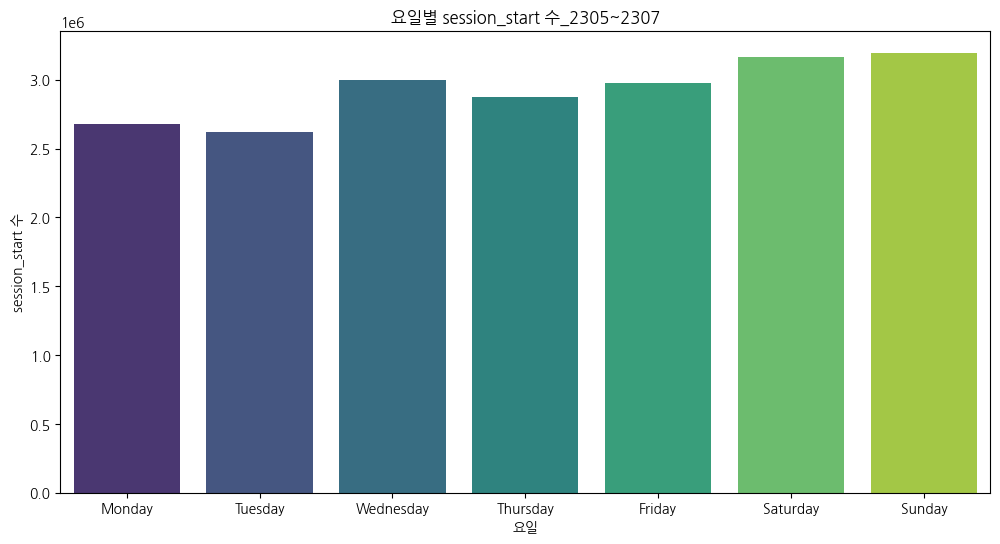

In [8]:
# session_id별로 event_key가 session_start인 경우의 요일, 시간대 알아내기
session_start_df = merged_df_final[merged_df_final['event_key'] == '$session_start'].copy()

# 요일별로 session_start 수 집계
session_start_week_counts = session_start_df.groupby(['event_day_of_week', 'event_day_name']).size().reset_index(name='session_start_count')
display(session_start_week_counts)
display(session_start_week_counts['session_start_count'].describe())

# 요일별로 session_start 수 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data = session_start_week_counts, x = 'event_day_of_week', y = 'session_start_count', palette='viridis')
plt.title('요일별 session_start 수_2305~2307')
plt.xlabel('요일')
plt.ylabel('session_start 수')   
plt.xticks(ticks = range(7), labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()  

,event_hour,count
0,0,1003471
1,1,1266353
2,2,1246948
3,3,1279374
4,4,1313781
5,5,1387890
6,6,1517621
7,7,1642400
8,8,1434009
9,9,1026499


count    2.400000e+01
mean     8.547109e+05
std      4.808628e+05
min      5.516100e+04
25%      5.325498e+05
50%      8.688175e+05
75%      1.269608e+06
max      1.642400e+06
Name: count, dtype: float64

/tmp/ipykernel_71066/129983259.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = session_start_hour_counts, x = 'event_hour', y = 'count', palette='viridis')


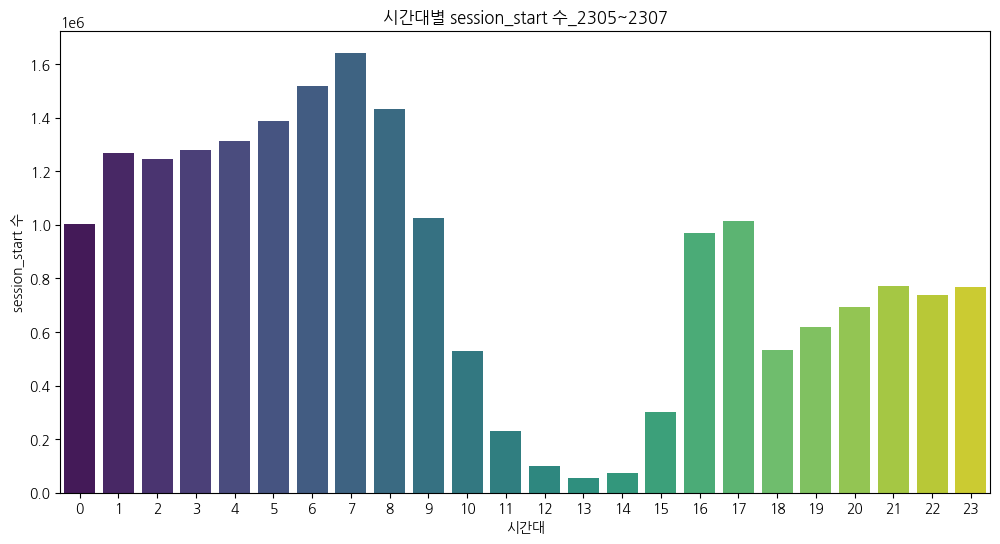

In [9]:
# 시간대별로 session_start 이벤트 개수 집계
session_start_hour_counts = session_start_df['event_hour'].value_counts().sort_index().reset_index()
display(session_start_hour_counts)
display(session_start_hour_counts['count'].describe())

# 시간대별로 session_start 이벤트 개수 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data = session_start_hour_counts, x = 'event_hour', y = 'count', palette='viridis')
plt.title('시간대별 session_start 수_2305~2307')
plt.xlabel('시간대')   
plt.ylabel('session_start 수')   
plt.show()   